## ¿Qué describe la ecuación?

La EDO $R\frac{dQ}{dt} + \frac{Q}{C} = E(t)$ es la ley matemática que gobierna cómo se acumula la carga $Q$ en el capacitor a lo largo del tiempo.

El término $R\frac{dQ}{dt}$ representa la caída de voltaje en la resistencia, que depende de la velocidad a la que fluye la carga (corriente).

El término $\frac{Q}{C}$ representa el voltaje en el capacitor, que depende de la carga que ya ha logrado acumular.

Resolver esta EDO nos da la fórmula exacta de $Q(t)$, mostrando que el capacitor no se carga instantáneamente, sino de forma exponencial: comienza cargándose rápido y luego se va frenando hasta alcanzar su carga máxima, todo dictado por los valores de $R$ y $C$. Siendo esta la solución
$$ Q(t) = E_0 C + K e^{-\frac{t}{RC}} $$

Algunas de los posibles situaciones que podrían simularse: 

## 1. Circuito electrónico típico
- $E_0 = 5\ \text{V}$ (voltaje estándar de circuitos integrados)
- $R = 1\ \text{k}\Omega$ (resistencia común)
- $C = 10\ \mu\text{F}$ (capacitor de filtro)

## 2. Circuito de potencia
- $E_0 = 12\ \text{V}$ (batería de automóvil)
- $R = 100\ \Omega$ 
- $C = 1000\ \mu\text{F}$ (capacitor electrolítico grande)

## 3. Circuito de temporización
- $E_0 = 9\ \text{V}$ (batería común)
- $R = 10\ \text{M}\Omega$ (resistencia muy grande)
- $C = 100\ \mu\text{F}$

## 4. Sistema de alimentación ininterrumpida (Ejemplo utilizado)
- $E_0 = 110\ \text{V}$ (voltaje residencial)
- $R = 50\ \Omega$
- $C = 0.05\ \text{F}$ = 50,000 μF


Utilizando los métodos numéricos de **Euler**, **Euler mejorado** y **Runge-Kutta-4** se pueden llegar a aproximaciones **muy precisas** de la solución real como se observa en las siguientes gráficas:

Solución Analítica:


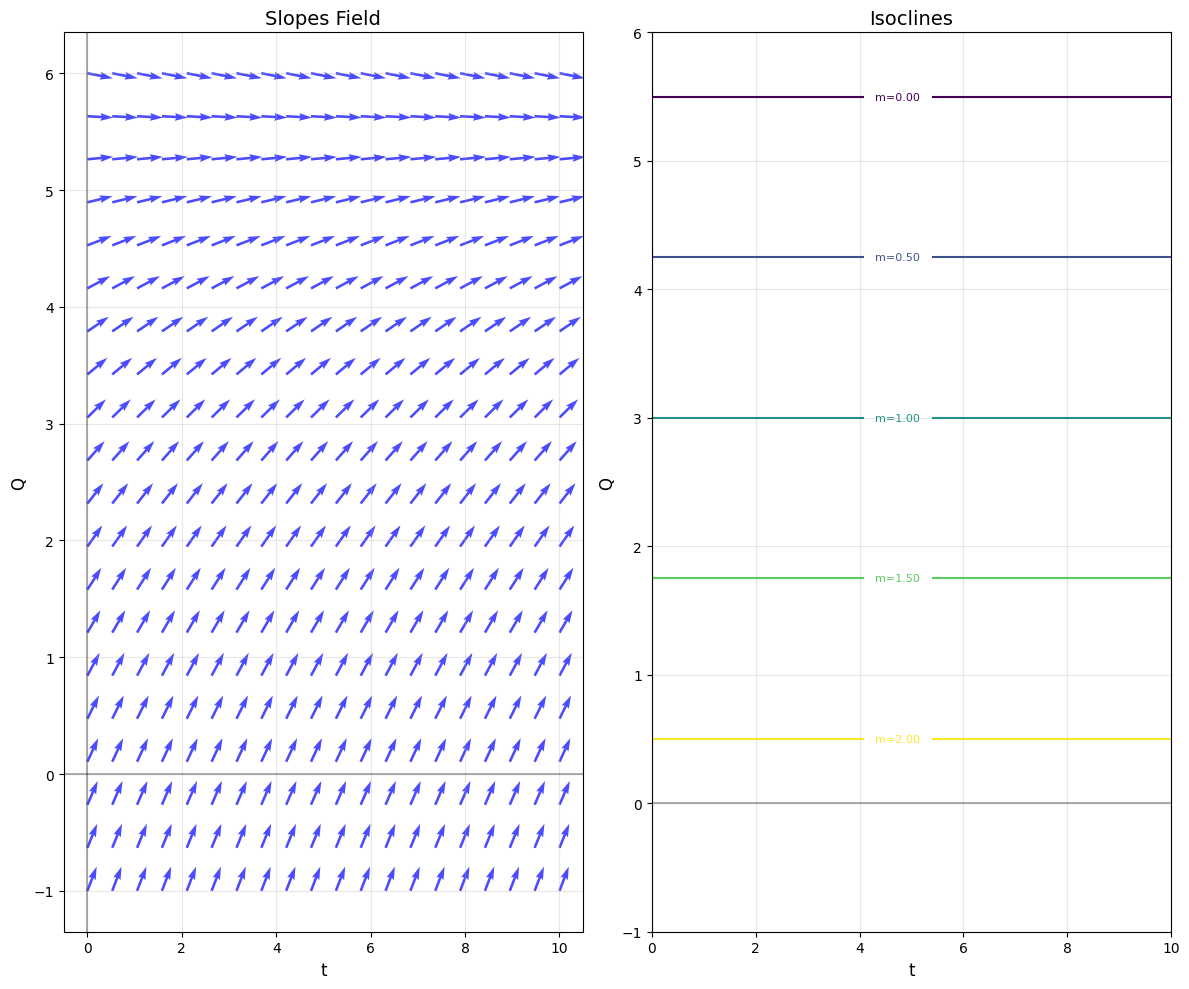

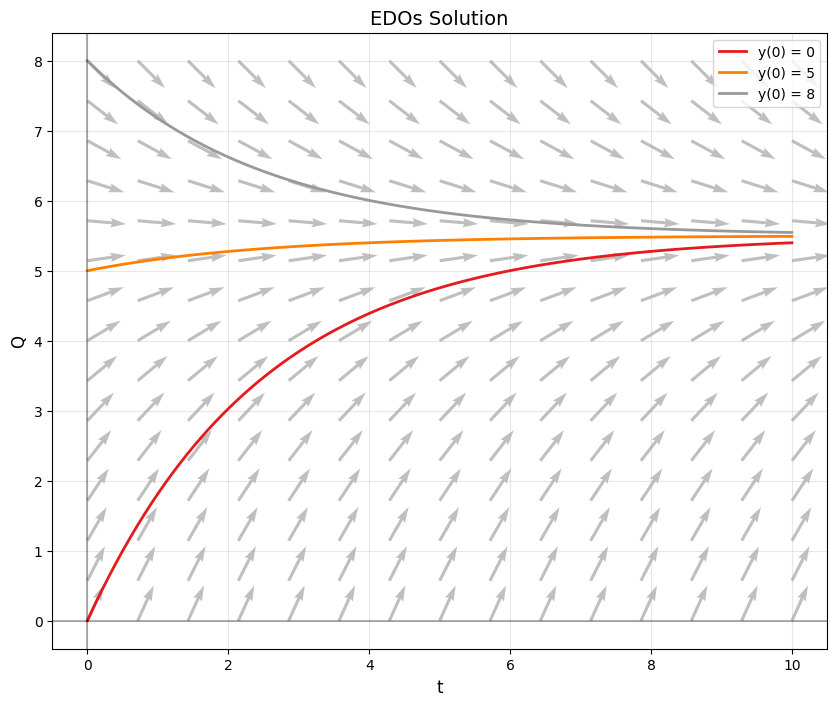

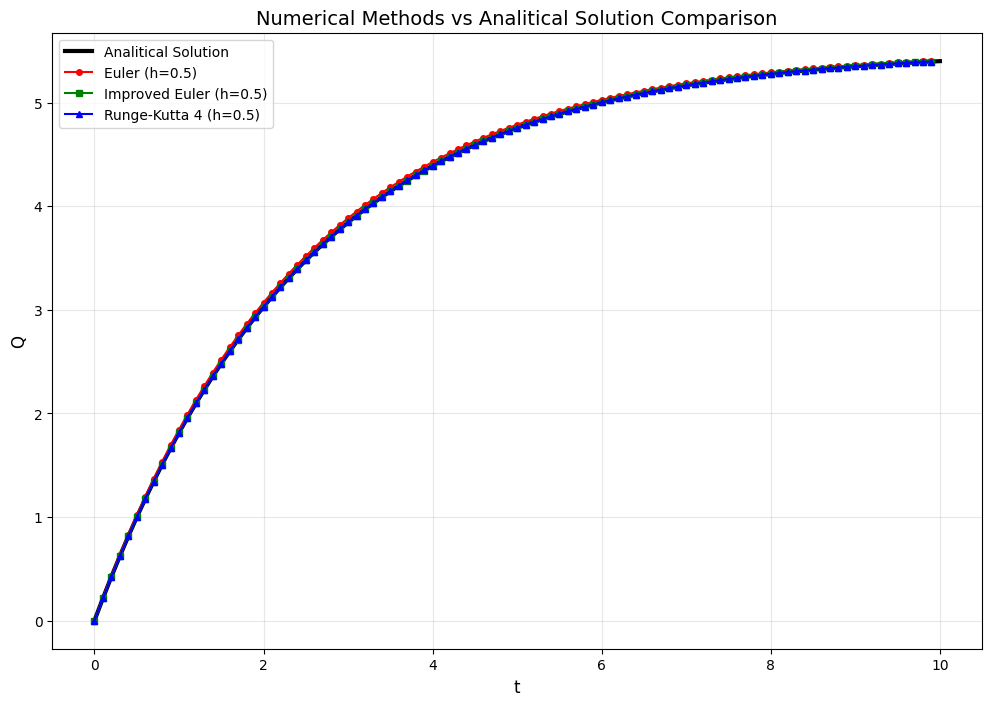

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class Ecuation:
    def __init__(self, ecuacion_diferencial):
        self.ecuacion = ecuacion_diferencial
    
    def graph_isoclines(self, xRange=(-5, 5), yRange=(-5, 5), Slopes=None, Density=20, FigureSize=(12, 10)):
        
        x = np.linspace(xRange[0], xRange[1], Density)
        y = np.linspace(yRange[0], yRange[1], Density)
        X, Y = np.meshgrid(x, y)
        
        U = np.ones_like(X) 
        V = self.ecuacion(X, Y)  
        
        norm = np.sqrt(U**2 + V**2)
        U = U / norm
        V = V / norm
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FigureSize)
        
        ax1.quiver(X, Y, U, V, color='blue', alpha=0.7, scale=20, width=0.005)
        ax1.set_title('Slopes Field', fontsize=14)
        ax1.set_xlabel('t', fontsize=12)
        ax1.set_ylabel('Q', fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        if Slopes is None:
            slopes_values = np.linspace(np.min(V), np.max(V), 8)
            Slopes = slopes_values[::2] 
        
        for m in Slopes:
            Z = self.ecuacion(X, Y) - m
            contorno = ax2.contour(X, Y, Z, levels=[0], colors=plt.cm.viridis(m/max(Slopes)))
            ax2.clabel(contorno, inline=True, fontsize=8, fmt=f'm={m:.2f}')
        
        ax2.set_title('Isoclines', fontsize=14)
        ax2.set_xlabel('t', fontsize=12)
        ax2.set_ylabel('Q', fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def add_sol(self, Initial_Conditions, xRange=(-5, 5), t_Points=100):
    
        x_sol = np.linspace(xRange[0], xRange[1], t_Points)
        
        plt.figure(figsize=(10, 8))
        
        solutions = []
        y_min = float('inf')
        y_max = -float('inf')
        
        for y0 in Initial_Conditions:
            def system_ecuation(y, x):
                return self.ecuacion(x, y)
            
            solucion = odeint(system_ecuation, y0, x_sol)
            solutions.append((y0, solucion))
            
            y_min = min(y_min, np.min(solucion[:, 0]))
            y_max = max(y_max, np.max(solucion[:, 0]))
        
        y_range = (y_min, y_max)
        
        self._add_slopes_field(x_range=xRange, y_range=y_range)
        
        colours = plt.cm.Set1(np.linspace(0, 1, len(Initial_Conditions)))
        
        for i, (y0, solucion) in enumerate(solutions):
            plt.plot(x_sol, solucion[:, 0], 
                    color=colours[i], 
                    linewidth=2, 
                    label=f'y({xRange[0]}) = {y0}')
        
        
        plt.title('EDOs Solution', fontsize=14)
        plt.xlabel('t', fontsize=12)
        plt.ylabel('Q', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.show()
       
    def graph_euler(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.euler_method(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, 'o-', linewidth=2, label=f'Euler (h={h})', markersize=6, color='red')
        self._graph_config('Euler Method')
        plt.show()
                
        return x_vals, y_vals

    def graph_improved_euler(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.improved_euler(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, 's-', linewidth=2, label=f'Euler Mejorado (h={h})', markersize=5, color='green')
        self._graph_config('Improved Euler Method')
        plt.show()
        
        return x_vals, y_vals

    def graph_runge_kutta(self, y0, x_range=(-5, 5), h=0.1, figsize=(10, 8)):
        x_vals, y_vals = self.runge_kutta_4(y0, x_range, h)
        
        plt.figure(figsize=figsize)
        self._add_slopes_field(x_range)
        plt.plot(x_vals, y_vals, '^-', linewidth=2, label=f'Runge-Kutta 4 (h={h})', markersize=5, color='blue')
        self._graph_config('Runge-Kutta 4 Method')
        plt.show()
        
        return x_vals, y_vals

    def euler_method(self, y0, x_range, h=0.1):
        x_vals = np.arange(x_range[0], x_range[1] + h, h)
        y_vals = np.zeros(len(x_vals))
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            d = self.ecuacion(x_vals[i-1], y_vals[i-1])
            
            y_vals[i] = y_vals[i-1] + h * d
        
        return x_vals, y_vals

    def improved_euler(self, y0, x_range, h=0.1):
        x_vals = np.arange(x_range[0], x_range[1] + h, h)
        y_vals = np.zeros(len(x_vals))
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            y_Euler = y_vals[i-1] + h * self.ecuacion(x_vals[i-1], y_vals[i-1])
            y_vals[i] = y_vals[i-1] + h * 0.5 * (
                self.ecuacion(x_vals[i-1], y_vals[i-1]) + 
                self.ecuacion(x_vals[i], y_Euler)
            )
        
        return x_vals, y_vals

    def runge_kutta_4(self, y0, x_range, h=0.1):
        n_points = int((x_range[1] - x_range[0]) / h) + 1
        x_vals = np.linspace(x_range[0], x_range[1], n_points)
        y_vals = np.zeros(n_points)
        y_vals[0] = y0
        
        for i in range(1, len(x_vals)):
            h_actual = x_vals[i] - x_vals[i-1]
            x_actual = x_vals[i-1]
            y_actual = y_vals[i-1]
            
            k1 = h_actual * self.ecuacion(x_actual, y_actual)
            k2 = h_actual * self.ecuacion(x_actual + h_actual/2, y_actual + k1/2)
            k3 = h_actual * self.ecuacion(x_actual + h_actual/2, y_actual + k2/2)  
            k4 = h_actual * self.ecuacion(x_actual + h_actual, y_actual + k3)
            
            y_vals[i] = y_actual + (k1 + 2*k2 + 2*k3 + k4) / 6
    
        return x_vals, y_vals

    def _add_slopes_field(self, x_range, y_range=None, density=15):
        if y_range is None:
            y_range = (-5, 5)
        
        x = np.linspace(x_range[0], x_range[1], density)
        y = np.linspace(y_range[0], y_range[1], density)
        X, Y = np.meshgrid(x, y)
        
        V = self.ecuacion(X, Y)
        
        U = np.ones_like(X)
        norm = np.sqrt(U**2 + V**2)
        U = U / norm
        V = V / norm
        
        plt.quiver(X, Y, U, V, color='gray', alpha=0.5, scale=20, width=0.004)

    def _graph_config(self, titulo):
        plt.title(titulo, fontsize=14)
        plt.xlabel('t', fontsize=12)
        plt.ylabel('Q', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)


#   PARÁMETROS A CAMBIAR
Eo = 110
C = 0.05
R = 50
    
def solucion_analitica(t, Q):
    return Eo * C * (1 - np.exp(-t / (R * C)))

def EDO(t, Q):
    return (Eo - Q/C) / R  
     
numerica = Ecuation(EDO)         
    
print("Solución Analítica:")
numerica.graph_isoclines(xRange=(0, 10), yRange=(-1, 6), Slopes=[0, 0.5, 1, 1.5, 2])
numerica.add_sol([0, 5, 8], xRange=(0, 10))
    
x1, y1 = numerica.euler_method(y0=0, x_range=(0, 9.9), h=0.1)
    
x2, y2 = numerica.improved_euler(y0=0, x_range=(0, 9.9), h=0.1)
    
x3, y3 = numerica.runge_kutta_4(y0=0, x_range=(0, 9.9), h=0.1)
    
plt.figure(figsize=(12, 8))
    
t_analitico = np.linspace(0, 10, 100)
Q_analitico = solucion_analitica(t_analitico, 0)
plt.plot(t_analitico, Q_analitico, 'k-', linewidth=3, label='Analitical Solution')
    
plt.plot(x1, y1, 'ro-', markersize=4, label=f'Euler (h=0.5)')
plt.plot(x2, y2, 'gs-', markersize=4, label=f'Improved Euler (h=0.5)')
plt.plot(x3, y3, 'b^-', markersize=4, label=f'Runge-Kutta 4 (h=0.5)')
    
plt.title('Numerical Methods vs Analitical Solution Comparison', fontsize=14)
plt.xlabel('t', fontsize=12)
plt.ylabel('Q', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Comportamiento de los Métodos

Los métodos numéricos presentan diferentes niveles de precisión:

- **Método de Euler**: Mayor error relativo (0.001517) y menor estabilidad
- **Euler Mejorado**: Error significativamente menor (0.000021) y mejor estabilidad  
- **Runge-Kutta 4**: Mejor aproximación con error mínimo y máxima estabilidad

# Orden de Convergencia

El orden de convergencia se calcula con:

$$ p = \frac{\log\left(\frac{\text{Error}_{h_1}}{\text{Error}_{h_2}}\right)}{\log\left(\frac{h_1}{h_2}\right)} $$

**Resultados promedios:**
- **Euler**: p ≈ 1.02 (orden 1 teórico)
- **Euler Mejorado**: p ≈ 2.04 (orden 2 teórico)
- **Runge-Kutta 4**: p ≈ 4.04 (orden 4 teórico)

La consistencia entre valores teóricos y experimentales valida la implementación numérica.

# ¿Por qué el comportamiento exponencial en el circuito RC?

La forma exponencial surge naturalmente porque **la velocidad de carga es proporcional a la carga que falta por acumular**, creando este característico crecimiento rápido inicial que luego se frena gradualmente, siendo el término $RC$ la **constante de tiempo** que determina que tan rápido se carga el capacitor.

### Comportamiento inicial (t = 0)
- Al conectar la batería, el capacitor está **descargado** ($Q = 0$)
- Todo el voltaje de la batería $E_0$ cae en la resistencia
- La corriente es **máxima**: $I(0) = E_0/R$
- La carga comienza a fluir **rápidamente** al capacitor

### Comportamiento transitorio
- A medida que el capacitor se carga, **se opone** al paso de más carga
- El voltaje en el capacitor aumenta: $V_C = Q/C$
- El voltaje disponible para la resistencia **disminuye**: $V_R = E_0 - Q/C$
- La corriente **disminuye exponencialmente**: $I(t) = \frac{E_0}{R}e^{-t/RC}$

### Comportamiento final (t → ∞)
- El capacitor alcanza su carga máxima: $Q_{max} = E_0C$
- El voltaje del capacitor iguala al de la batería
- La corriente se hace **cero**
- El sistema alcanza el **equilibrio**


# Diagrama de bifurcación
Este proyecto muestra cómo varían los equilibrios del sistema unidimensional:

$$\dot z = \mu - z^2,$$

donde $\mu$ es el parámetro de control. Al cambiar $\mu$, aparecen o desaparecen equilibrios y cambia su estabilidad. Esto corresponde a una bifurcación de tipo silla–nodo en $\mu=0$.

### **Resumen del código**

El script calcula los puntos de equilibrio $z=\pm\sqrt{\mu}$ (cuando $\mu \ge 0$) y dibuja sus ramas, indicando estabilidad: la rama superior es estable y la inferior inestable. Para $\mu<0$ no hay equilibrios reales.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de parámetros mu (puede cambiar estos valores)
mu = np.linspace(-1.0, 2.0, 800)  

z_plus = np.full_like(mu, np.nan)
z_minus = np.full_like(mu, np.nan)

mask = mu >= 0
z_plus[mask] = np.sqrt(mu[mask])
z_minus[mask] = -np.sqrt(mu[mask])

print('Ejemplo: primeros 5 valores de mu:', mu[:5])
print('Ejemplo: primeros 5 valores de z_plus (NaN si mu<0):', z_plus[:5])

Ejemplo: primeros 5 valores de mu: [-1.         -0.99624531 -0.99249061 -0.98873592 -0.98498123]
Ejemplo: primeros 5 valores de z_plus (NaN si mu<0): [nan nan nan nan nan]


### **Estabilidad de las ramas**

Para un equilibrio $z^*$, la derivada de $f(z)=\mu - z^2$ es $f'(z)=-2z$.
- En $z=+\sqrt{\mu}$: $f'=-2\sqrt{\mu}<0$ si $\mu>0$ ⇒ equilibrio estable (atractor).
- En $z=-\sqrt{\mu}$: $f'=+2\sqrt{\mu}>0$ si $\mu>0$ ⇒ equilibrio inestable (repulsor).

En $\mu=0$ las dos ramas colapsan en $z=0$ y para $\mu<0$ no hay equilibrios reales.

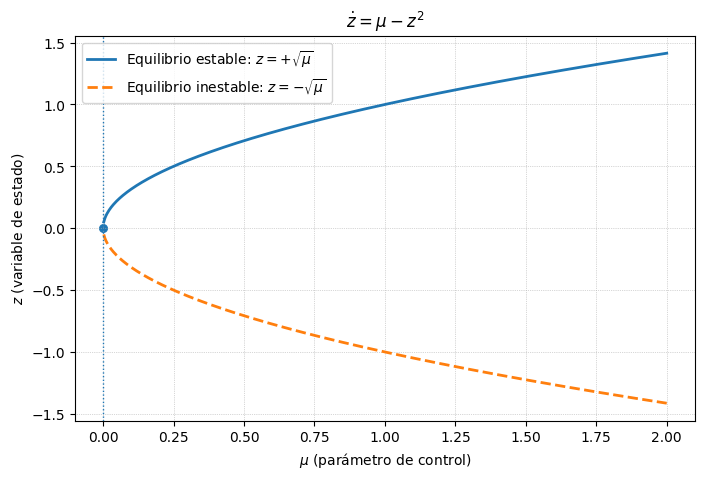

In [3]:
plt.figure(figsize=(8, 5))

plt.plot(mu, z_plus, linestyle='-', linewidth=2, label=r'Equilibrio estable: $z=+\sqrt{\mu}$')
plt.plot(mu, z_minus, linestyle='--', linewidth=2, label=r'Equilibrio inestable: $z=-\sqrt{\mu}$')

plt.axvline(0, linestyle=':', linewidth=1)

plt.title(r'$\dot z = \mu - z^2$')
plt.xlabel(r'$\mu$ (parámetro de control)')
plt.ylabel(r'$z$ (variable de estado)')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend(loc='upper left')

plt.scatter([0], [0], s=30)

plt.show()

### **Lectura rápida de la figura**

Para $\mu>0$ aparecen dos ramas: $z=+\sqrt{\mu}$ (superior, estable) y $z=-\sqrt{\mu}$ (inferior, inestable). A medida que $\mu$ crece, la rama estable aumenta suavemente y la inestable disminuye. En $\mu=0$ ambas se tocan en el origen; para $\mu<0$ no hay equilibrio real, de ahí que no se trace ninguna rama en esa región.

### **Notas y experimentos sugeridos**

- Para ver cómo cambian las ramas, se puede modificar el rango de $\mu$ (por ejemplo `np.linspace(-2, 3, 1200)`).
- Para aumentar la resolución se cambia el número de puntos (segundo argumento de `np.linspace`).
- Para estudiar la dinámica temporal (trayectorias), se puede integrar la ecuación diferencial con un integrador simple y observar cómo convergen o divergen hacia las ramas según el valor de $\mu$.

## **Plano de fase y estabilidad**

Dado el sistema que describe el comportamiento de un circuito RC:
    $$
    \begin{cases}
    \frac{dQ}{dt} = I \\
    \frac{dI}{dt} = -2I - 5Q
    \end{cases}
    $$

### **Se puede clasificar el sistema según:**

- **Tipo:** Es un <u>*sistema de ecuaciones diferenciales ordinarias*</u> ya que se deriva siempre con respecto a una sola variable independiente *t*.
- **Orden:** Es un <u>sistema de orden 1</u> ya que el mayor orden de derivación que aparece es de 1.
- **Linealidad:** Es un <u>sistema lineal</u> ya que las dos ecuaciones diferenciales ordinarias que lo componen son lineales.
- **Homogeneidad:** Es un <u>sistema homogéneo</u> ya que las dos ecuaciones diferenciales ordinarias que lo componen son homogéneas y es un sistema lineal.
- **Estabilidad:** Es un <u>sistema estable</u> ya que tiene autovalores complejos con parte real negativa.

<h4><strong>Representación matricial:</strong></h4>

$$
\begin{bmatrix}
Q' \\
I'
\end{bmatrix}

=

\begin{bmatrix}
0 & 1 \\
-5 & -2
\end{bmatrix}
*
\begin{bmatrix}
Q \\
I
\end{bmatrix}
$$

Tenemos entonces $$
X' = \begin{bmatrix}
Q' \\
I'
\end{bmatrix}; A = \begin{bmatrix}
0 & 1 \\
-5 & -2
\end{bmatrix}; X = \begin{bmatrix}
Q \\
I
\end{bmatrix} $$

Entonces el polinomio característico de A es:
$ \lambda^2 + 2 \lambda + 5 = 0 $ 

Y entonces los autovalores son $ \lambda = -1 \pm 2i $

Dando como solución general 
$$
\mathbb{X} = 

e^{t} * 
(
    c_1 *
    \begin{bmatrix}
    \cos{2t}\\
    -\cos{2t} - 2\sin{2t}
    \end{bmatrix}

    +

    c_2 *
    \begin{bmatrix}
    \sin{2t}\\
    -\sin{2t} + 2\cos{2t}
    \end{bmatrix}
)
$$

### Cálculo del punto crítico:
Tomando el sistema:

$$
    \begin{cases}
    \frac{dQ}{dt} = I \\
    \frac{dI}{dt} = -2I - 5Q\\
    \end{cases}
$$

Su punto crítico es el punto en el que se cumple:

$$
    \begin{cases}
    \frac{dQ}{dt} = 0 \\
    \frac{dI}{dt} = 0
    \end{cases}
$$

O sea     
$$
    \begin{cases}
    I = 0 \\
    -2I - 5Q = 0 \\
    \end{cases}
$$

$$
    -5Q = 0    \Rightarrow Q = 0 \wedge I = 0\\
$$

Y por tanto el punto crítico del sistema es el **(0,0)**, siendo este un punto estable.

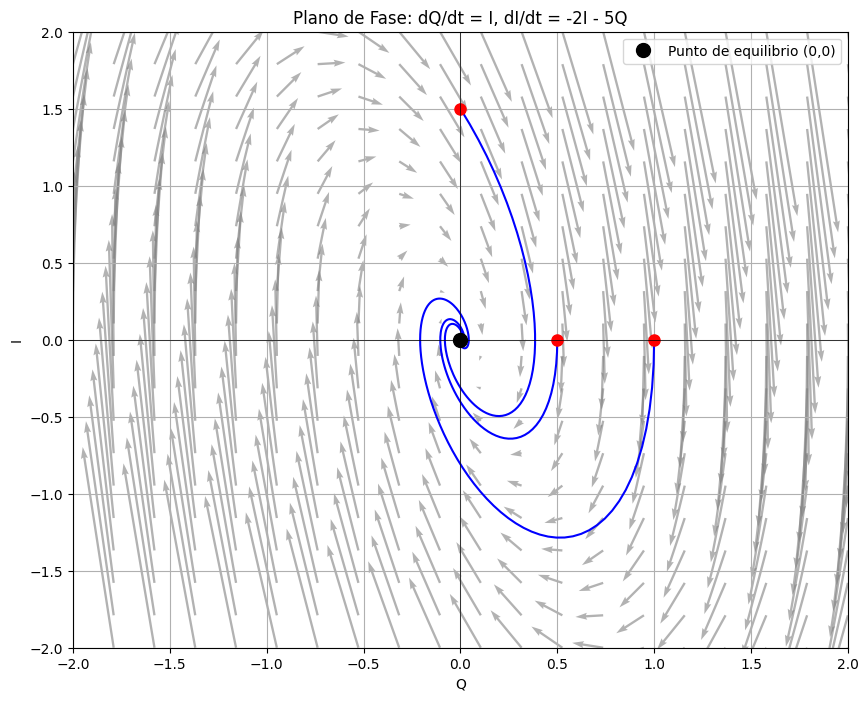

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sistema(variables, t):
    Q, I = variables
    dQdt = I
    dIdt = -2 * I - 5 * Q
    return [dQdt, dIdt]

Q_min, Q_max = -2, 2
I_min, I_max = -2, 2
n_points = 20

Q_values = np.linspace(Q_min, Q_max, n_points)
I_values = np.linspace(I_min, I_max, n_points)
Q_grid, I_grid = np.meshgrid(Q_values, I_values)

dQ_dt = I_grid
dI_dt = -2 * I_grid - 5 * Q_grid

t = np.linspace(0, 10, 300)

condiciones_iniciales = [
    [1.0, 0],    # Capacitor cargado, sin corriente
    [0.5, 0],    # Capacitor medio cargado
    [0, 1.5],    # Sin carga, con corriente
]

plt.figure(figsize=(10, 8))

plt.quiver(Q_grid, I_grid, dQ_dt, dI_dt, color='gray', alpha=0.6, scale=50)

for cond in condiciones_iniciales:
    sol = odeint(sistema, cond, t)
    plt.plot(sol[:, 0], sol[:, 1], 'b-', linewidth=1.5)
    plt.plot(cond[0], cond[1], 'ro', markersize=8)

#Graficamos el punto crítico
plt.plot(0, 0, 'ko', markersize=10, label='Punto de equilibrio (0,0)')


plt.title('Plano de Fase: dQ/dt = I, dI/dt = -2I - 5Q')
plt.xlabel('Q')
plt.ylabel('I')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(Q_min, Q_max)
plt.ylim(I_min, I_max)
plt.legend()

plt.show()

### Diagrama de fase para el circuito RC

 El diagrama de dicho sistema representa un **foco estable** centrado en el origen, puesto que todas las trayectorias se aproximan en espiral a $(Q,I) = (0,0)$ para cualquier condición inicial elegida. Esto se debe a que los autovalores de la matriz del sistema son **complejos conjugados con parte real negativa**, λ = −1±2i: la parte real −1 provoca un decaimiento exponencial de la amplitud, mientras que la parte imaginaria ±2i genera oscilaciones con frecuencia angular amortiguada. El origen es el **único punto crítico** del sistema y actúa como **atractor**: para todas las condiciones iniciales mostradas, la carga y la corriente tienden a cero a medida que el sistema alcanza el estado de reposo

 ### ¿Qué representan estas oscilaciones?
 Corresponden al intercambio de energía entre el capacitor y el inductor, además, como la resistencia disipa energía, provoca una reducción progresiva de la amplitud. 
 
 ### ¿Por que oscila en ese sentido?
 En el cuadrante superior derecho $(Q > 0, I > 0)$ se tiene $\frac{dQ}{dt} = I > 0$ y $\frac{dI}{dt} = −2I −5Q < 0$, lo que desplaza el estado hacia la derecha y hacia abajo, iniciando la rotación ensentido horario.